The task is to predict whether a person makes over $50,000 or less in a year based on multiple socio-economic factors, using the Adult Income Census dataset. The dataset is taken from kaggle website: https://www.kaggle.com/uciml/adult-census-income.

The Census Income dataset has 32,561 entries. Each entry contains the following information
about an individual:

Attributes:

**income**: >50K, <=50K

**age**: continuous

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

**fnlwgt**: continuous, final weight. In other words, this is the number of people the census believes the entry represents.

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool education-num: continuous

**marital.status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

**sex**: Female, Male

**capital.gain**: continuous

**capital.loss**: continuous

**hours.per.week**: continuous

**native.country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-pastel')
sns.set()

#Importing dataset
data_df = pd.read_csv("adult.csv")

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

#Avoid warning
import warnings
warnings.simplefilter(action='ignore')

### Data Visualization

In [2]:
#Data feature information and check for missing values
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
data_df.sample(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4031,24,Private,163665,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,2174,0,40,United-States,<=50K
5837,31,Private,226756,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,0,0,40,United-States,<=50K
29876,18,?,312634,11th,7,Never-married,?,Own-child,White,Male,0,0,25,United-States,<=50K
14669,26,?,132749,Bachelors,13,Never-married,?,Not-in-family,White,Female,0,0,80,United-States,<=50K
9576,31,Self-emp-inc,83748,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,70,South,<=50K
28191,27,Private,178564,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,30,United-States,<=50K
172,39,Private,156897,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,2258,42,United-States,>50K
5000,33,Self-emp-inc,155781,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,?,<=50K
16821,24,Private,218678,Bachelors,13,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,<=50K
32297,42,Private,204235,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K


Text(0, 0.5, 'Number of entries')

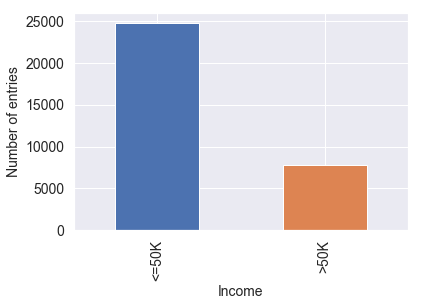

In [4]:
# Total number of entries in each class
ax1 = data_df['income'].value_counts().plot(kind='bar', fontsize = 14)
ax1.set_xlabel("Income",fontsize=14)
ax1.set_ylabel("Number of entries",fontsize=14)

The above plot shows that the number of entries in two classes are not equally distributed. For such an imbalanced data set the classification accuracy may not be a good performance metric. So I will use F1-score to measure the model performance.

Text(0.5, 1.0, 'Education vs Income')

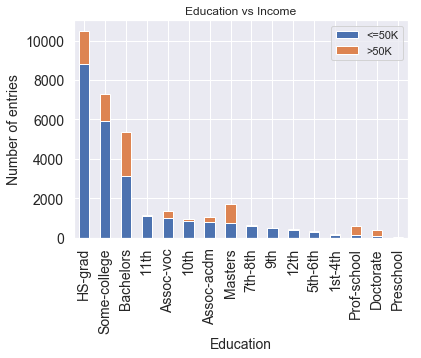

In [5]:
# Number of entries in each class based on education
d1 = data_df['education'][data_df['income']=='<=50K'].value_counts()
d1.name = '<=50K'
d2 = data_df['education'][data_df['income']=='>50K'].value_counts()
d2.name = '>50K'
education_df = pd.concat([d1, d2], axis=1, sort=False)
ax1 = education_df.plot(kind='bar', fontsize = 14, stacked=True)
ax1.set_xlabel("Education",fontsize=14)
ax1.set_ylabel("Number of entries",fontsize=14)
ax1.set_title('Education vs Income')

Text(0.5, 1.0, 'Occupation vs Income')

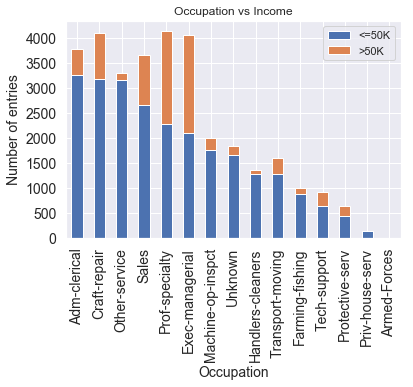

In [6]:
# Number of entries in each class based on occupation
d1 = data_df['occupation'][data_df['income']=='<=50K'].value_counts()
d1.name = '<=50K'
d2 = data_df['occupation'][data_df['income']=='>50K'].value_counts()
d2.name = '>50K'
occupation_df = pd.concat([d1, d2], axis=1, sort=False)
occupation_df.rename(index={'?':'Unknown'},inplace=True)
occupation_df.fillna(0, inplace=True)
ax1 = occupation_df.plot(kind='bar', fontsize = 14, stacked=True)
ax1.set_xlabel("Occupation",fontsize=14)
ax1.set_ylabel("Number of entries",fontsize=14)
ax1.set_title('Occupation vs Income')

Text(0.5, 1.0, 'Workclass vs Income')

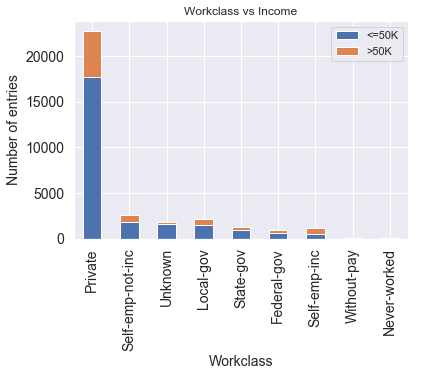

In [7]:
# Number of entries in each class based on workclass
d1 = data_df['workclass'][data_df['income']=='<=50K'].value_counts()
d1.name = '<=50K'
d2 = data_df['workclass'][data_df['income']=='>50K'].value_counts()
d2.name = '>50K'
workclass_df = pd.concat([d1, d2], axis=1, sort=False)
workclass_df.rename(index={'?':'Unknown'},inplace=True)
workclass_df.fillna(0, inplace=True)
ax1 = workclass_df.plot(kind='bar', fontsize = 14, stacked=True)
ax1.set_xlabel("Workclass",fontsize=14)
ax1.set_ylabel("Number of entries",fontsize=14)
ax1.set_title('Workclass vs Income')

Text(0.5, 1.0, 'Race vs Income')

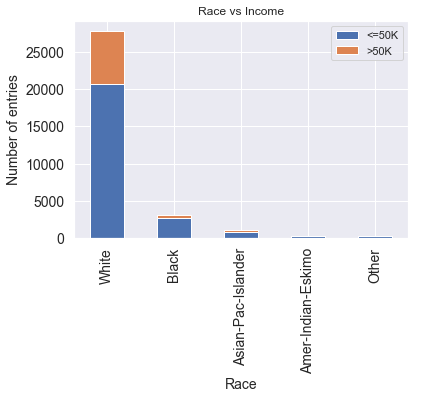

In [8]:
# Number of entries in each class based on Race
d1 = data_df['race'][data_df['income']=='<=50K'].value_counts()
d1.name = '<=50K'
d2 = data_df['race'][data_df['income']=='>50K'].value_counts()
d2.name = '>50K'
race_df = pd.concat([d1, d2], axis=1, sort=False)
race_df.fillna(0, inplace=True)
ax1 = race_df.plot(kind='bar', fontsize = 14, stacked=True)
ax1.set_xlabel("Race",fontsize=14)
ax1.set_ylabel("Number of entries",fontsize=14)
ax1.set_title('Race vs Income')

Text(0.5, 1.0, 'Sex vs Income')

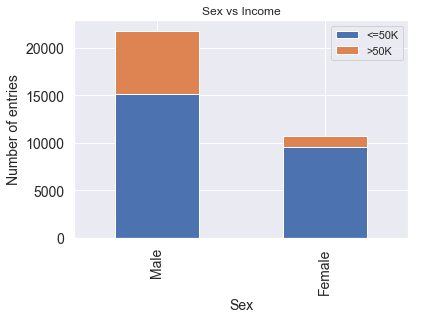

In [9]:
# Number of entries in each class based on sex
d1 = data_df['sex'][data_df['income']=='<=50K'].value_counts()
d1.name = '<=50K'
d2 = data_df['sex'][data_df['income']=='>50K'].value_counts()
d2.name = '>50K'
sex_df = pd.concat([d1, d2], axis=1, sort=False)
sex_df.fillna(0, inplace=True)
ax1 = sex_df.plot(kind='bar', fontsize = 14, stacked=True)
ax1.set_xlabel("Sex",fontsize=14)
ax1.set_ylabel("Number of entries",fontsize=14)
ax1.set_title('Sex vs Income')

Text(0.5, 1.0, 'Marital status vs Income')

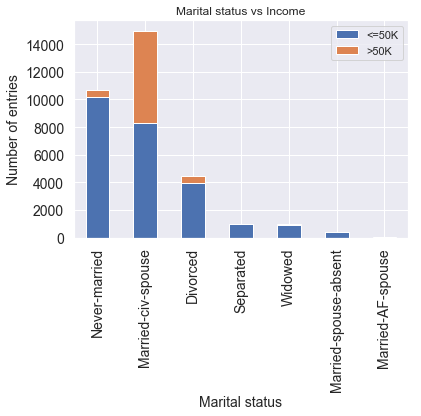

In [10]:
# Number of entries in each class based on marital status
d1 = data_df['marital.status'][data_df['income']=='<=50K'].value_counts()
d1.name = '<=50K'
d2 = data_df['marital.status'][data_df['income']=='>50K'].value_counts()
d2.name = '>50K'
marital_status_df = pd.concat([d1, d2], axis=1, sort=False)
marital_status_df.fillna(0, inplace=True)
ax1 = marital_status_df.plot(kind='bar', fontsize = 14, stacked=True)
ax1.set_xlabel("Marital status",fontsize=14)
ax1.set_ylabel("Number of entries",fontsize=14)
ax1.set_title('Marital status vs Income')

Text(0.5, 1.0, 'Age vs Income')

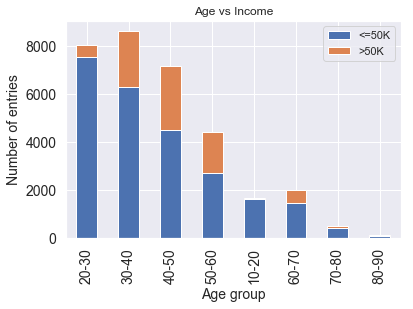

In [11]:
# Number of entries in each class based on age

def func(x):
    if x < 20:
        return "10-20"
    elif x < 30:
        return "20-30"
    elif x < 40:
        return "30-40"
    elif x < 50:
        return "40-50"
    elif x < 60:
        return "50-60"
    elif x < 70:
        return "60-70"
    elif x < 80:
        return "70-80"
    else:
        return '80-90'
data_df["age_classification"] = data_df["age"].apply(func)
d1 = data_df['age_classification'][data_df['income']=='<=50K'].value_counts()
d1.name = '<=50K'
d2 = data_df['age_classification'][data_df['income']=='>50K'].value_counts()
d2.name = '>50K'
age_df = pd.concat([d1, d2], axis=1, sort=False)
age_df.fillna(0, inplace=True)
ax1 = age_df.plot(kind='bar', fontsize = 14, stacked=True)
ax1.set_xlabel("Age group",fontsize=14)
ax1.set_ylabel("Number of entries",fontsize=14)
ax1.set_title('Age vs Income')

Text(0.5, 1.0, 'Relationship vs Income')

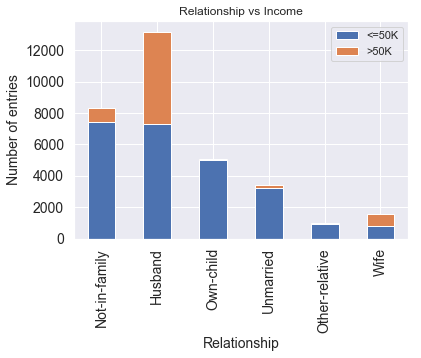

In [12]:
# Number of entries in each class based on relationship
d1 = data_df['relationship'][data_df['income']=='<=50K'].value_counts()
d1.name = '<=50K'
d2 = data_df['relationship'][data_df['income']=='>50K'].value_counts()
d2.name = '>50K'
relationship_df = pd.concat([d1, d2], axis=1, sort=False)
relationship_df.fillna(0, inplace=True)
ax1 = relationship_df.plot(kind='bar', fontsize = 14, stacked=True)
ax1.set_xlabel("Relationship",fontsize=14)
ax1.set_ylabel("Number of entries",fontsize=14)
ax1.set_title('Relationship vs Income')

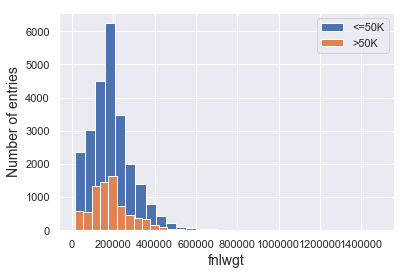

In [13]:
# Histogram plot for 'fnlwgt'
ax1 = data_df["fnlwgt"][data_df['income']=='<=50K'].hist(bins=30, label = '<=50K')
ax1 = data_df["fnlwgt"][data_df['income']=='>50K'].hist(bins=30, label = '>50K')
ax1.set_xlabel("fnlwgt",fontsize=14)
ax1.set_ylabel("Number of entries",fontsize=14)
ax1.legend()

### Data Preprocessing 

In [14]:
# First we have to encode any categorical data to numerical data 
data_df["marital.status"] = data_df["marital.status"]\
.replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], '0')
data_df["marital.status"] = data_df["marital.status"]\
.replace(['Never-married','Divorced','Separated','Widowed'], '1')
data_df["marital.status"] = data_df["marital.status"].astype(int)
data_df['income']=data_df['income'].map({'<=50K': 0, '>50K': 1})
data_df['sex']=data_df['sex'].map({'Male': 0, 'Female': 1})

le = preprocessing.LabelEncoder()
data_df['relationship'] = le.fit_transform(data_df['relationship'])
data_df['occupation'] = le.fit_transform(data_df['occupation'])
data_df['workclass'] = le.fit_transform(data_df['workclass'])

# Drop the insignificant features to build our model prediction
data_df.drop(columns=["education","race","fnlwgt","age_classification","native.country"], \
             axis = 1, inplace = True)

In [15]:
data_df.sample(10)

,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,income
14348,18,4,10,1,8,3,1,0,0,15,0
21734,24,4,10,1,1,3,1,0,0,40,0
21372,52,7,9,0,11,0,0,0,0,40,1
6837,40,7,13,0,1,0,0,0,0,40,0
17856,72,0,10,1,0,4,1,0,0,4,0
6925,42,4,11,1,1,4,1,0,0,40,0
11632,24,5,10,1,14,3,0,0,0,40,0
6019,51,4,9,1,8,4,1,0,0,38,0
2773,38,4,13,0,4,0,0,7298,0,50,1
4755,19,4,10,1,1,3,0,0,0,28,0


In [16]:
X=data_df.drop(columns = 'income')
y=data_df['income']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,\
                                                    random_state=42, shuffle=True)

### Classification Models

Machine Learning Models to be used
<ul>
<li>Logistic Regression</li>
    <li>K-Nearest Neighbour</li>
<li>Linear Discriminat Analysis</li>
<li>Decision Tree</li>
<li>Random Forest</li>
<li>XGBoost</li>

</ul>

#### Logistic Regression

In [17]:
logr = LogisticRegression(solver ='lbfgs', max_iter =500)
parameters = {'C':[10, 1, .1, .001]}
logr_clf = GridSearchCV(estimator=logr, param_grid=parameters, cv = 5, scoring='f1')
logr_clf.fit(X_train, y_train)
print('Best parameters:',logr_clf.best_params_)
print('Accuracy = {:.3f}%'.format(logr_clf.best_estimator_.score(X_test, y_test)*100))
y_pred = logr_clf.best_estimator_.predict(X_test)
print('F1-score = {:.3f}'.format(f1_score(y_pred, y_test)))
print(classification_report(y_test, y_pred))

Best parameters: {'C': 0.1}
Accuracy = 82.865%
F1-score = 0.587
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4976
           1       0.68      0.52      0.59      1537

   micro avg       0.83      0.83      0.83      6513
   macro avg       0.77      0.72      0.74      6513
weighted avg       0.82      0.83      0.82      6513



#### K-Nearest Neighbour Classification

In [18]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[3,4,5,6,7,8,9,10]}
knn_clf = GridSearchCV(estimator=knn, param_grid=parameters, cv = 5, scoring='f1')
knn_clf.fit(X_train, y_train)
print('Best parameters:',knn_clf.best_params_)
print('Accuracy = {:.3f}%'.format(knn_clf.best_estimator_.score(X_test, y_test)*100))
y_pred = knn_clf.best_estimator_.predict(X_test)
print('F1-score = {:.3f}'.format(f1_score(y_pred, y_test)))
print(classification_report(y_test, y_pred))

Best parameters: {'n_neighbors': 9}
Accuracy = 84.969%
F1-score = 0.652
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4976
           1       0.72      0.60      0.65      1537

   micro avg       0.85      0.85      0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



#### Linear Discriminant Analysis

In [19]:
ldr = LinearDiscriminantAnalysis(solver = 'lsqr')
parameters = {'shrinkage': [0, 0.2, 0.4, 0.6, 0.8, 1.0]}
ldr_clf = GridSearchCV(estimator=ldr, param_grid=parameters, cv = 5, scoring='f1')
ldr_clf.fit(X_train, y_train)
print('Best parameters:',ldr_clf.best_params_)
print('Accuracy = {:.3f}%'.format(ldr_clf.best_estimator_.score(X_test, y_test)*100))
y_pred = ldr_clf.best_estimator_.predict(X_test)
print('F1-score = {:.3f}'.format(f1_score(y_pred, y_test)))
print(classification_report(y_test, y_pred))

Best parameters: {'shrinkage': 0}
Accuracy = 82.926%
F1-score = 0.584
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4976
           1       0.69      0.51      0.58      1537

   micro avg       0.83      0.83      0.83      6513
   macro avg       0.77      0.72      0.74      6513
weighted avg       0.82      0.83      0.82      6513



#### Decision Tree

In [20]:
dt = DecisionTreeClassifier()
parameters = {'max_depth': [4, 5, 6, 7, 8, 9, 10]}
dt_clf = GridSearchCV(estimator=dt, param_grid=parameters, cv = 5, scoring='f1')
dt_clf.fit(X_train, y_train)
print('Best parameters:',dt_clf.best_params_)
print('Accuracy = {:.3f}%'.format(dt_clf.best_estimator_.score(X_test, y_test)*100))
y_pred = dt_clf.best_estimator_.predict(X_test)
print('F1-score = {:.3f}'.format(f1_score(y_pred, y_test)))
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': 10}
Accuracy = 86.013%
F1-score = 0.660
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4976
           1       0.77      0.57      0.66      1537

   micro avg       0.86      0.86      0.86      6513
   macro avg       0.83      0.76      0.79      6513
weighted avg       0.85      0.86      0.85      6513



#### Random Forest

In [21]:
rf = RandomForestClassifier()
parameters = {'n_estimators': [50, 100, 150, 200]}
rf_clf = GridSearchCV(estimator=rf, param_grid=parameters, cv = 5, scoring='f1')
rf_clf.fit(X_train, y_train)
print('Best parameters:',rf_clf.best_params_)
print('Accuracy = {:.3f}%'.format(rf_clf.best_estimator_.score(X_test, y_test)*100))
y_pred = rf_clf.best_estimator_.predict(X_test)
print('F1-score = {:.3f}'.format(f1_score(y_pred, y_test)))
print(classification_report(y_test, y_pred))

Best parameters: {'n_estimators': 150}
Accuracy = 84.754%
F1-score = 0.657
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4976
           1       0.70      0.62      0.66      1537

   micro avg       0.85      0.85      0.85      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



Text(0.5, 1.0, 'Feature importance')

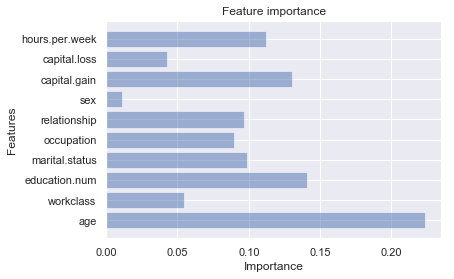

In [22]:
plt.barh(X_train.columns.values, rf_clf.best_estimator_.feature_importances_, \
         align = 'center', color = 'b', alpha = 0.5)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature importance')

#### XGBoost

In [23]:
xgb = XGBClassifier()
parameters = {'n_estimators': [50, 100, 150, 200]}
xgb_clf = GridSearchCV(estimator=xgb, param_grid=parameters, cv = 5, scoring='f1')
xgb_clf.fit(X_train, y_train)
print('Best parameters:',xgb_clf.best_params_)
print('Accuracy = {:.3f}%'.format(xgb_clf.best_estimator_.score(X_test, y_test)*100))
y_pred = xgb_clf.best_estimator_.predict(X_test)
print('F1-score = {:.3f}'.format(f1_score(y_pred, y_test)))
print(classification_report(y_test, y_pred))

Best parameters: {'n_estimators': 200}
Accuracy = 87.011%
F1-score = 0.691
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4976
           1       0.79      0.62      0.69      1537

   micro avg       0.87      0.87      0.87      6513
   macro avg       0.84      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



### Result
| Classifier | Accuracy (%) | F1-score
| --- | --- | --- |
| Logistic Regression | 82.865 | 0.587 |
| K-Nearest Neighbour | 84.969 | 0.652 |
| Linear Discriminant Analysis | 82.926 | 0.584 |
| Decision Tree | 86.013 | 0.660 |
| Random Forest | 84.754 | 0.657 |
| XGBoost | 87.011 | 0.691| 